In [10]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import TruncatedSVD
from kneed import KneeLocator

In [11]:
# Importing the warnings

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading the dataset

df = pd.read_csv(r'C:\Users\Shashi\Model Building\Unsupervised Learning or Descriptive Model\Dimension Reduction\PCA\Datasets_PCA_Problem Statement\wine.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [15]:
# Checking the null values

df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [16]:
# SVD MODEL

svd = TruncatedSVD(n_components = 5)

### Make Pipeline
### By using Mean imputation null values can be impute

### Data has to be standardized to address the scale difference

In [17]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), svd)

In [20]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df) 

In [21]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=5))])

In [22]:
# Apply the pipeline on the dataset
data = pd.DataFrame(processed.transform(df))

data

,0,1,2,3,4
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109
174,2.942729,-1.752263,0.207480,0.399381,0.154223
175,3.027272,-2.756040,-0.940803,0.607758,1.128136
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083


# Save the End to End SVD pipeline with Imputation and Standardization

In [23]:
import joblib

joblib.dump(processed, 'svd_DimRed')

['svd_DimRed']

In [24]:
import os 
os.getcwd()

'C:\\Users\\Shashi\\Model Building\\Unsupervised Learning or Descriptive Model\\Dimension Reduction\\SVD'

### Importing the pipeline


In [25]:
model = joblib.load("svd_DimRed")

In [26]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=5))])

### Apply the saved model on to the Dataset to extract PCA values

In [27]:
svd_res = pd.DataFrame(model.transform(df))

svd_res

,0,1,2,3,4
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109
174,2.942729,-1.752263,0.207480,0.399381,0.154223
175,3.027272,-2.756040,-0.940803,0.607758,1.128136
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083


### SVD for Feature Extraction 

In [44]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df, svd_res.iloc[:, 0:3]], axis = 1)
final.columns = ['data', 'svd0', 'svd1', 'svd2', 'svd3', 'svd4', 'svd5']
final

,data,svd0,svd1,svd2,svd3,svd4,svd5
0,1,14.23,1.71,2.43,-3.522934,-1.453098,-0.164795
1,1,13.20,1.78,2.14,-2.528858,0.330019,-2.026707
2,1,13.16,2.36,2.67,-2.785029,-1.036936,0.983238
3,1,14.37,1.95,2.50,-3.922588,-2.768210,-0.174968
4,1,13.24,2.59,2.87,-1.407511,-0.867773,2.025829
...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,3.627996,-2.206617,-0.343668
174,3,13.40,3.91,2.48,2.942729,-1.752263,0.207480
175,3,13.27,4.28,2.26,3.027272,-2.756040,-0.940803
176,3,13.17,2.59,2.37,2.755222,-2.293784,-0.550474


0      Text(14.23, 1.71, '1.0')
1       Text(13.2, 1.78, '1.0')
2      Text(13.16, 2.36, '1.0')
3      Text(14.37, 1.95, '1.0')
4      Text(13.24, 2.59, '1.0')
                 ...           
173    Text(13.71, 5.65, '3.0')
174     Text(13.4, 3.91, '3.0')
175    Text(13.27, 4.28, '3.0')
176    Text(13.17, 2.59, '3.0')
177     Text(14.13, 4.1, '3.0')
Length: 178, dtype: object

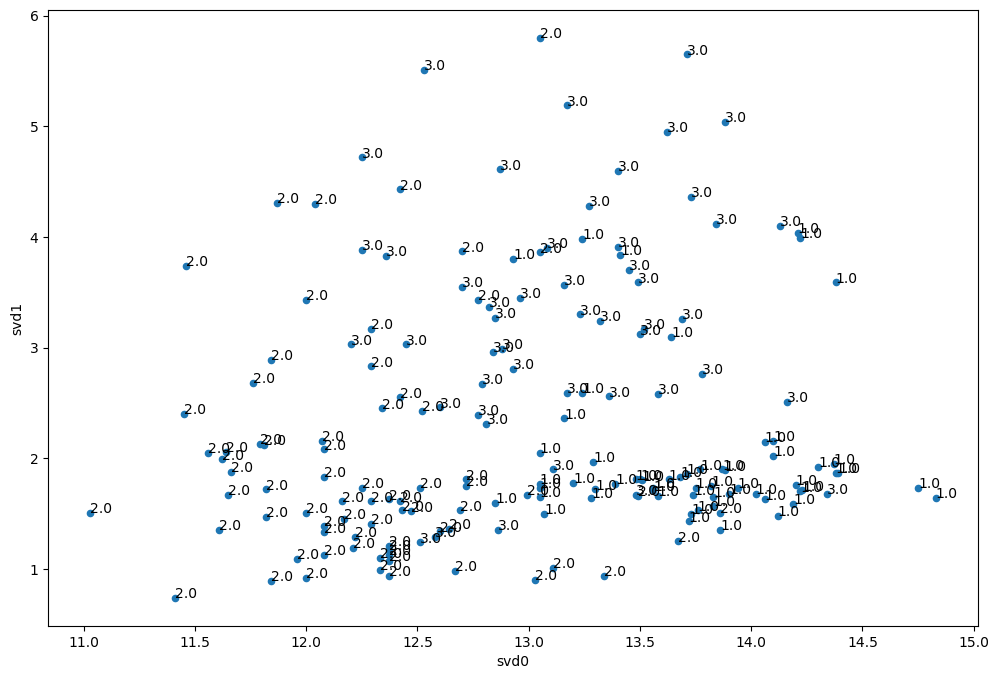

In [46]:
# Scatter diagram
ax = final.plot(x = 'svd0', y = 'svd1', kind = 'scatter', figsize = (12, 8))
final[['svd0', 'svd1', 'data']].apply(lambda x: ax.text(*x), axis = 1)